# Laptop Price Predictor

This project is about predicting the price of a laptop based on common features like Memory, Processor and many more attributes. 

## Importing libraries and dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Load the dataset 
df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


**The Prices of the laptops are in Indian Rupees so we will convert the prices to dollar**

In [3]:
df["Price"] = df["Price"] * 0.0121

In [4]:
# View the name of the columns
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
# Removing the "unamed: 0" column
df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,863.682067
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,579.535831
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,370.695600
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1635.863566
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1162.759277


In [6]:
# Check for null values
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

There are no null values present in the data set.

In [7]:
# Check for duplicate rows
df.duplicated().sum()

29

There are 29 duplicated rows in the data set

In [8]:
# Get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


We can see that there are 1303 rows in the dataset and 11 columns. We can also see from the `Dtype` column above that we have categorical and numeric(float) object data types in the dataset.

Now we want to separate the categorical features and the numeric features in the dataset

In [9]:
# Separate the categorical and and numerical features
catvars = df.select_dtypes(include=["object"]).columns
numvars = df.select_dtypes(exclude=["object"]).columns

catvars, numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

We will write some helper functions below:

In [10]:
def uniqueval(col):
    """
    Get the unique values present in a the given column
    """
    print(f"Unique values in column '{col}' are: {df[col].unique()}")
    
def valuecounts(col):
    """
    This function takes in a column name and prints out 
    the value counts of the entries in the column. 
    """
    print(f"Value counts of column {col} are: {df[col].value_counts()} ")
    
for col in df.columns:
    uniqueval(col)
    print("."*75)

Unique values in column 'Company' are: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
...........................................................................
Unique values in column 'TypeName' are: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
...........................................................................
Unique values in column 'Inches' are: [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
...........................................................................
Unique values in column 'ScreenResolution' are: ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchs

In [11]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,863.682067
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,579.535831
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,370.695600


Observing the data above, we can see if we remove `"GB"` from the entries of the Ram column, it can make it as an integer value. Same goes with the Memory column as well as the Weight column. For the weight column, we can classify it as a floating variable using the `str.replace()` as shown in the code below.

In [12]:
# Remove the "GB" and "kg" from the Ram and Weight columns respectively
df["Ram"] = df["Ram"].str.replace("GB", "")
df["Weight"] = df["Weight"].str.replace("kg", "")

# convert the data type from string -> integer for the Ram column
df["Ram"] = df["Ram"].astype("int32")

# convert the data type from string -> float for the Weigh column
df["Weight"] =df["Weight"].astype("float32")

df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,370.695600


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## Exploratory Data Analysis

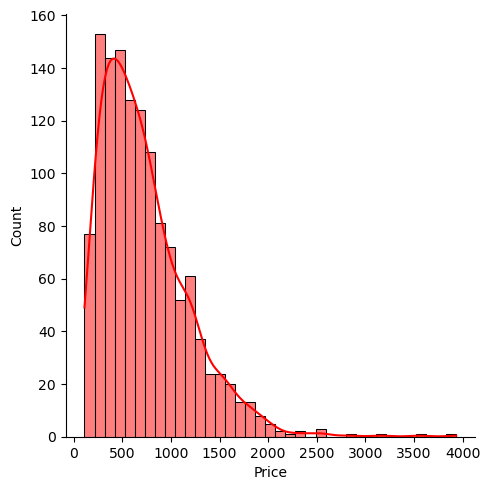

In [14]:
# View the distribution of the price (target) column

sns.displot(df["Price"], color="red", kde=True);

We can see from the distribution that this is a bit of a right-skewed Gaussian distribution. 

This likely indicate the presence of outliers.

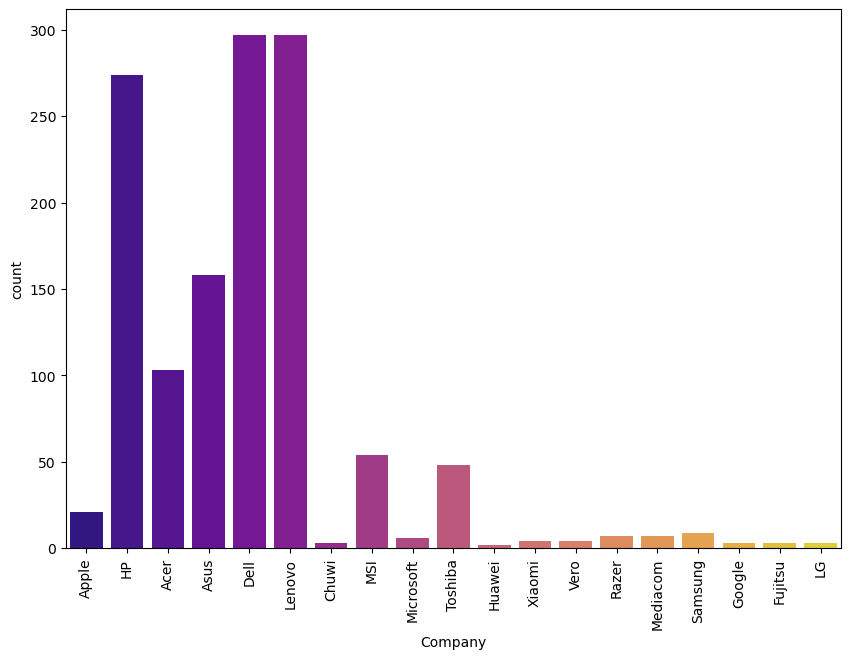

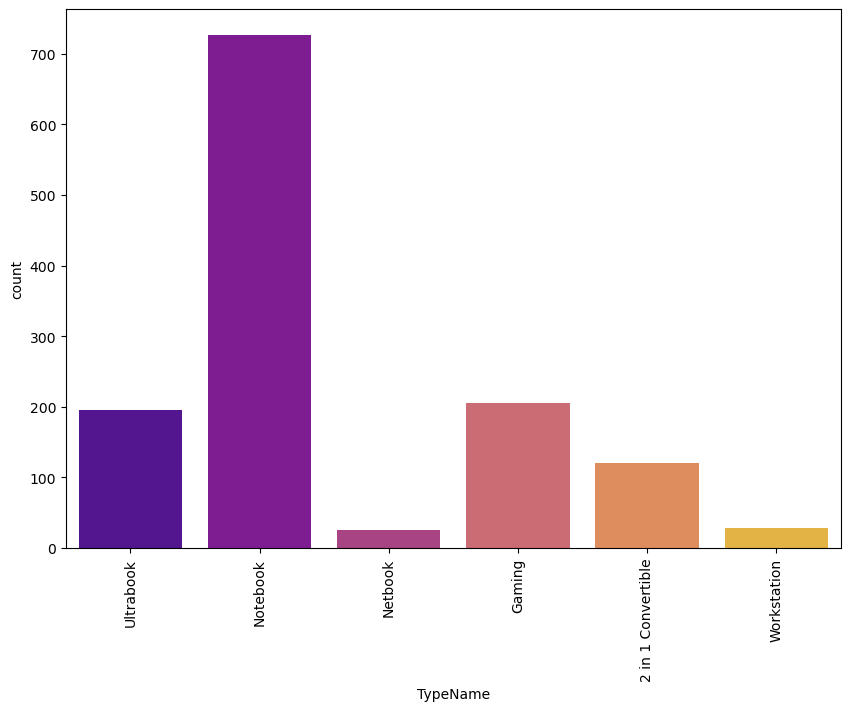

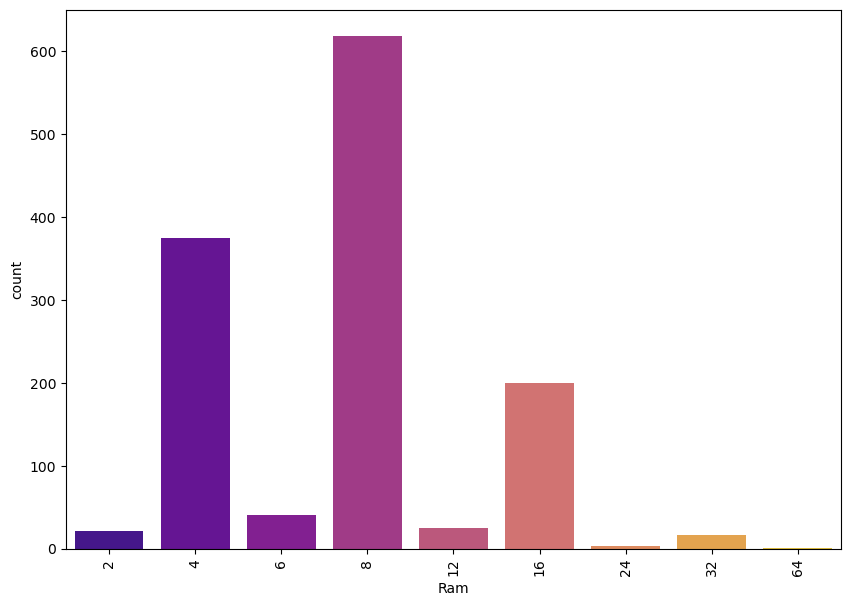

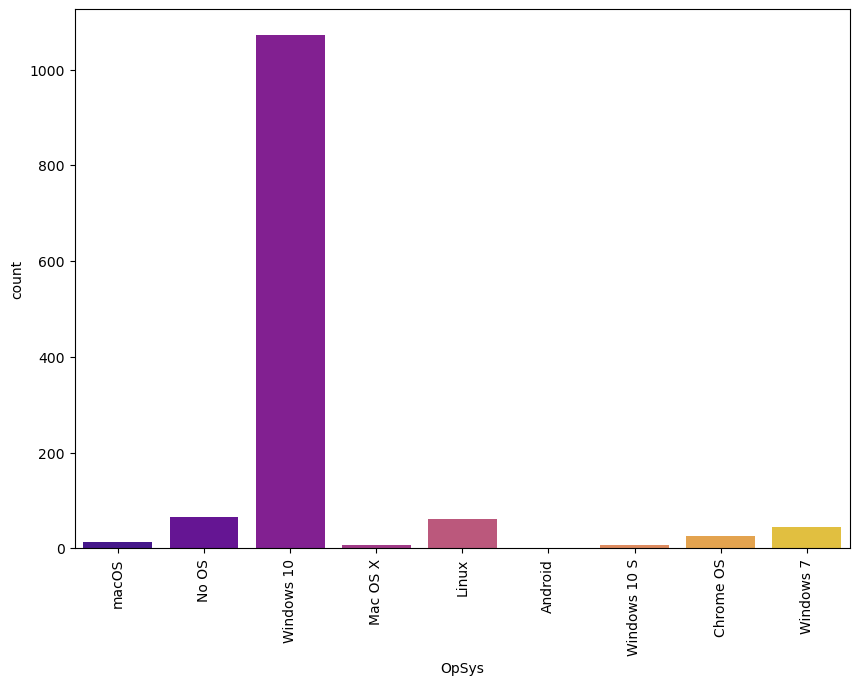

In [15]:
# Plot countplots for the categorical variables
def drawplot(col):
    """
    This function takes in a column name of a dataframe and plots 
    the count plot of the values in the column
    """
    plt.figure(figsize=(10, 7))
    sns.countplot(x=col, data=df, palette="plasma")
    plt.xticks(rotation="vertical")
    
toview = ['Company', "TypeName", "Ram", "OpSys"]
for col in toview:
    drawplot(col);

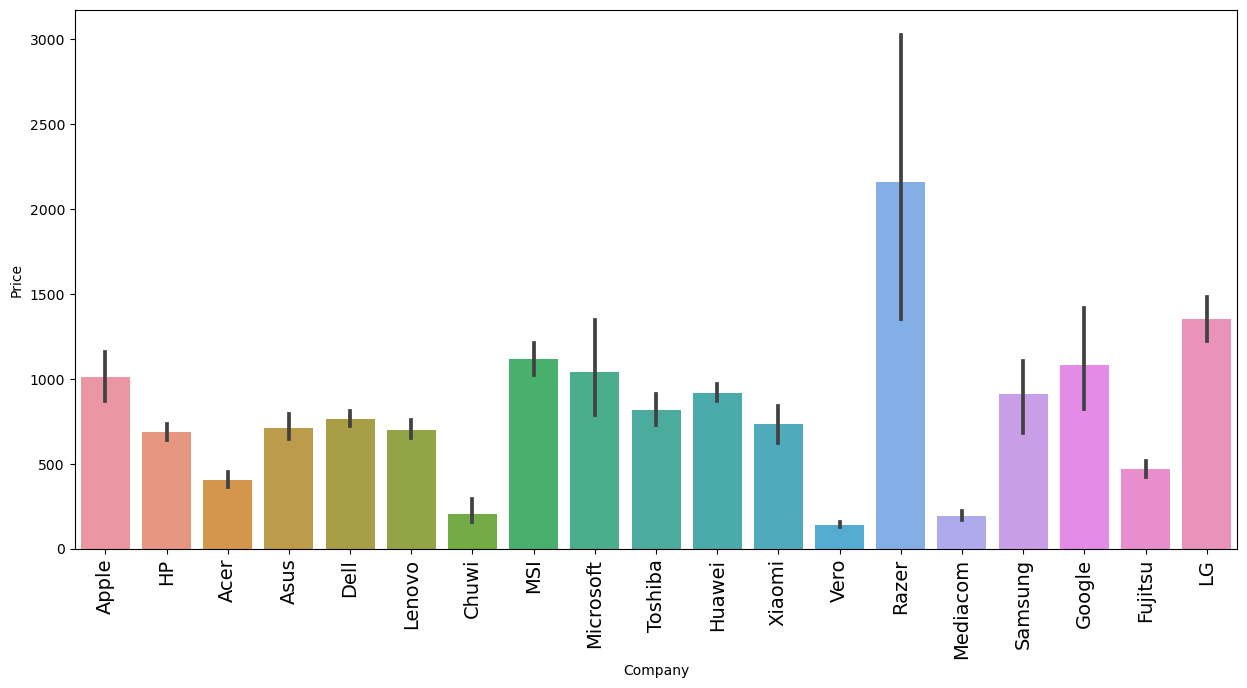

In [16]:
# Average price for each of the laptop brands
# This will give us insights into each company's laptop varying prices

plt.figure(figsize=(15,7))
sns.barplot(x=df["Company"], y=df["Price"])
plt.xticks(rotation="vertical", fontsize=14)
plt.show()

We can see the average price variations in all the companies. `Razer` laptop average prices are the highest in the data set while `Vero, Mediacom` and `Chuwi` are the lowest.

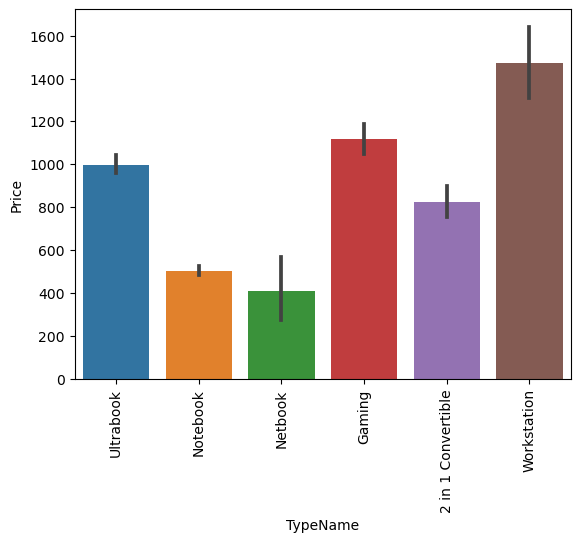

In [17]:
# Laptop type and variation about the price

sns.barplot(x=df["TypeName"], y=df["Price"])
plt.xticks(rotation="vertical");

Work stations type of laptops cost more in the data set while Notebook and Netbook are the least expensive types of laptops in the data set

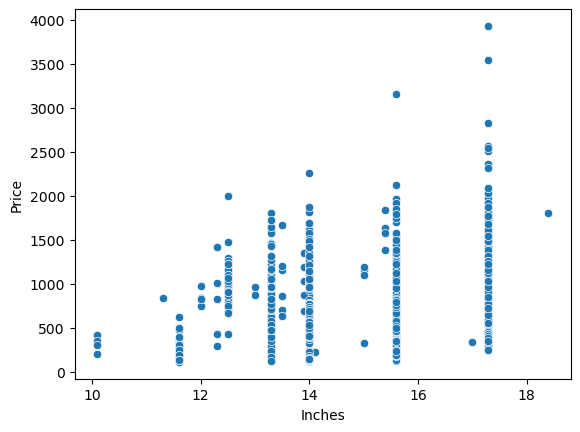

In [18]:
# Variation of inches towards the price 

sns.scatterplot(x=df["Inches"], y=df["Price"]);

For the `Screen Resolution` we have many types of Screen Resolutions available as shown, like `Touch Screen`, `Normal` and `IPS Panel` are the 3parts on basis of which we can segregate.

Let's explore the screen resolution column

In [19]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [20]:
# Create a new column, touchscreen. 
# If the value is 1, that laptop is a touch screen

df["Touchscreen"] = df["ScreenResolution"].apply(
    lambda element: 1 if "Touchscreen" in element else 0
)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0


In [21]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
456,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.7GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,1319.031648,0
192,Xiaomi,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,1.30,644.623531,0
85,Dell,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.65,869.684112,0
748,Dell,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,726.376416,0
24,HP,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.91,424.849392,0


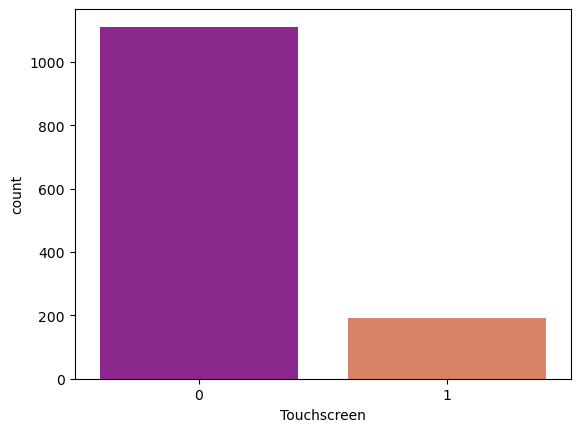

In [22]:
# Visualize the countplot of TouchScreen Column
sns.countplot(x="Touchscreen", data=df, palette="plasma");

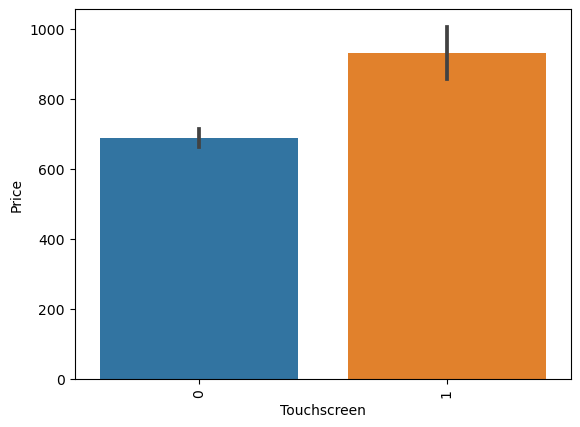

In [23]:
# Visualize the and compare the price of Touchscreen

sns.barplot(x=df["Touchscreen"], y=df["Price"])
plt.xticks(rotation = "vertical");

In [24]:
# Create a new column "IPS": does the laptop have IPS facility or not

df["IPS"] = df["ScreenResolution"].apply(
    lambda element: 1 if "IPS" in element else 0
)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1


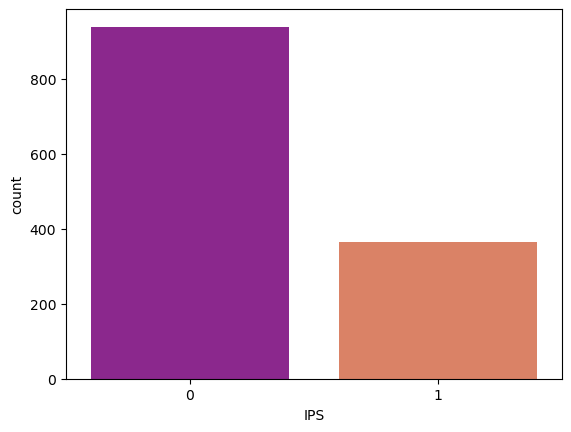

In [25]:
# Visualize the count of laptops with IPS functionality
sns.countplot(x="IPS", data=df, palette="plasma");

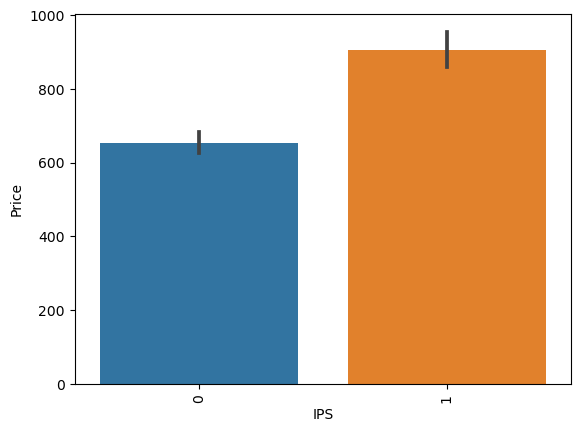

In [26]:
# Visualize the price of laptops with and without IPS
sns.barplot(x=df["IPS"], y=df["Price"])
plt.xticks(rotation = "vertical");

**Extracting the X Resolution and Y Resolution**

We will split the test at the "x" letter and separate the 2 parts. We can observe that one of the column is the Y resolution and the we need to do some feature engineering on the X resolution column.

In [27]:
# Extract X and Y resolutions from the "ScreenResolution" column

splitdf = df["ScreenResolution"].str.split("x", n=1, expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [28]:
# Get and create the X and Y resolution columns

df["X_res"] = splitdf[0]
df["Y_res"] = splitdf[1]

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,IPS Panel Retina Display 2560,1600


From the `X_res` column, we need to extract the only the digits but the problem is that the numbers are scattered in some cases. THis is the reason why we are using `regex`. This will help us extract only the numbers which is what we need.

* We first replace all the "," with ""
* Then find all numbers from the string using reges "\d+\.?\d+"
* "\d" means integers numbers 
* "\.?" means all the numbers which come after an number
* "\d+" means the string must end with any length of numbers

In [29]:
# This method also works
df["X_res"].str.split().apply(lambda x: x[-1])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: object

In [30]:
# Extrat only the numbers from the string

df["X_res"] = df["X_res"].str.replace(",", "").str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,2560,1600


The `X_res` and `Y_res` columns are text so we will need to convert them to integers

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [32]:
df["X_res"] = df["X_res"].astype("int")
df["Y_res"] = df["Y_res"].astype("int")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


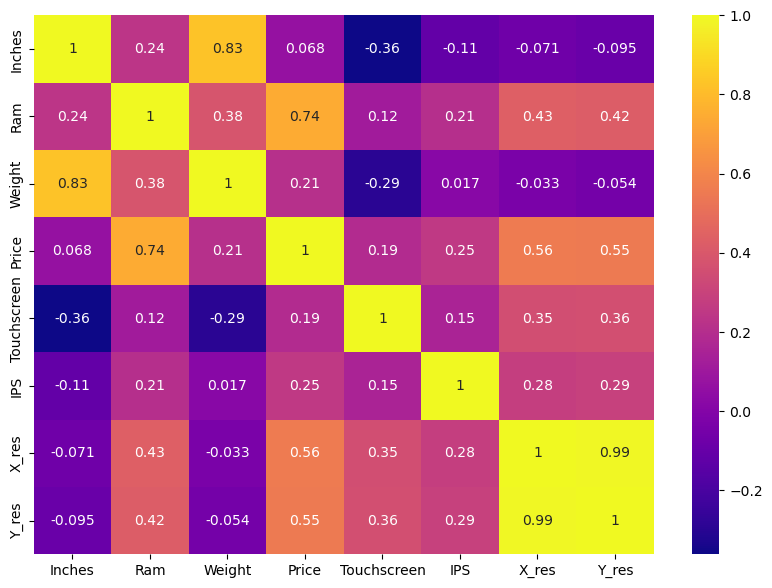

In [33]:
# Let's plot a correlation map
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="plasma");

From the correlation heatmap above, we can see that there is a high correlation between columns `X_res` and `Y_res`

In [34]:
# Compare the correlation of all features to the price column
df.corr(numeric_only=True)["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

From the correlation plot, we can observe that as the `X_res` and `Y_res` are increasing, the price of laptop is also increasing, therefore the two columns are positively correlated and they are giving much information about the price of laptop which is our target column.

The `Ram` also have a high correlation to the price of laptop.

Therefore, `Resolution` and `Ram` are very important features.

We can creat a new colum names `PPI (pixels per inch)`. As we saw from the correlation plot that the `X_res` and `Y_res` are having much collinearity, so we will combine them  with `Inches` column which is having less collinearity with any other column.

$$
    PPI(pixels per inch) = \frac{\sqrt{X\_resolution^2+Y\_resolution^2}}{inches}
$$

In [35]:
df["PPI"] = ((df["X_res"]**2+df["Y_res"]**2)**0.5/df["Inches"]).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,2560,1600,226.983005


In [36]:
df.corr(numeric_only=True)["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

So a we observed from the correlation data that the `PPI` column is having a good positive correlation to the `Price` column, therefore we will be using this column as it is a combination of 3 features engineered into one and it gives a collective result of 3 columns. We will drop `Inches`, `X_res`, and `Y_res` as well.

In [37]:
df.drop(columns=["ScreenResolution", "Inches", "X_res", "Y_res"], inplace=True)

df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,226.983005


**Now Let's work on `CPU` Column**

The `Cpu` column has also so we will need to process it efficiently as we may get useful insights from it.

In [38]:
# Get the value count of the Cpu colum
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [39]:
len(df["Cpu"].value_counts())

118

From the output above, it can be clearly observed that the most common processors are mabe by `Intel`. Therefore, we will cluster their processor into different categories like `i3`, `i5`, `i7`, and `others`. Here "`others`" means the processors of intel which do not have `i3`, `i5` or `i7` attached to it, it is completely different so this is the reason we will cluster them into `other` and the `other` category is inclusive of `AMD` which is a different Cpu category. This is because their presence is not much in the market.

If we observe closely, we will see that we need to extract the first 3 words of the `Cpu` column entries as the first 3 words of every row under the `Cpu` column is the type of Cpu used by the specific laptop. ↓

In [40]:
df["CPU_name"] =  df["Cpu"].apply(lambda text: " ".join(text.split()[:3]))

df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,226.983005,Intel Core i5


As mentioned earlier, if we get any of the intel `i3, i5, or i7` versions, we will return them as it is, but if we get any other processor, we will first check whether it is a variant of the intel or not. If it is a variant of intel, we will tag it as "Other intel Processor" else we will say it is and "AMD Processor".

In [41]:
# Write a function thet checks waht type or variation of processor

def processortype(text):
    
    if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3":
        return text
    
    else:
        if text.split()[0]=="Intel":
            return "Other Intel Processor"
        
        else:
            return "AMD Processor"
            

In [42]:
df["CPU_name"] = df["CPU_name"].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,226.983005,Intel Core i5


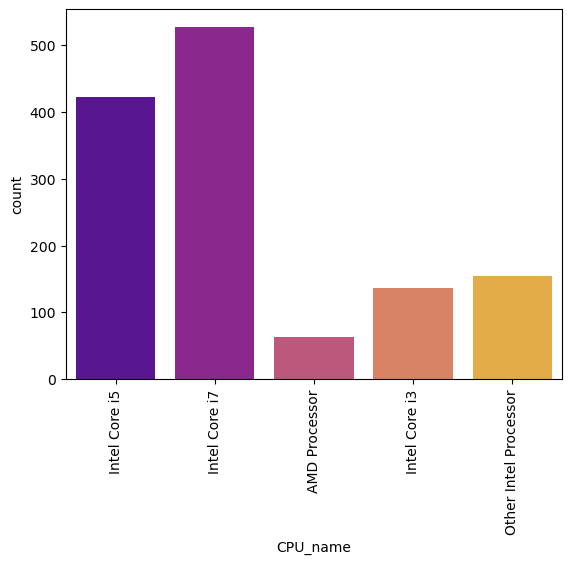

In [43]:
# Get a count plot of the CPU_name column
sns.countplot(data=df, x="CPU_name", palette="plasma")
plt.xticks(rotation="vertical");

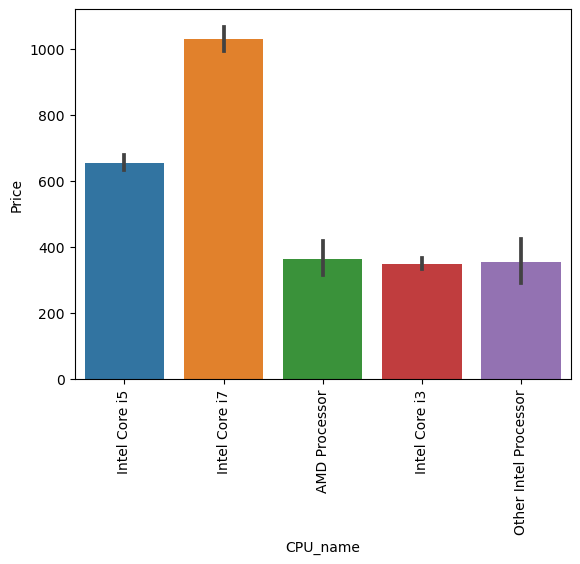

In [44]:
# Lets compare the CPU_name VS price variation
sns.barplot(x=df["CPU_name"], y=df["Price"])
plt.xticks(rotation="vertical");

In [45]:
# We can drop the cpu column
df.drop(columns=["Cpu"], inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,226.983005,Intel Core i5


**Analyzing the RAM column**

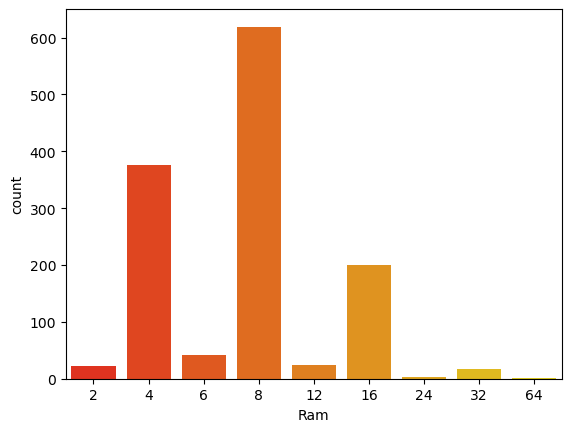

In [46]:
# lets have a look at the count plot
sns.countplot(data=df, x="Ram", palette="autumn");

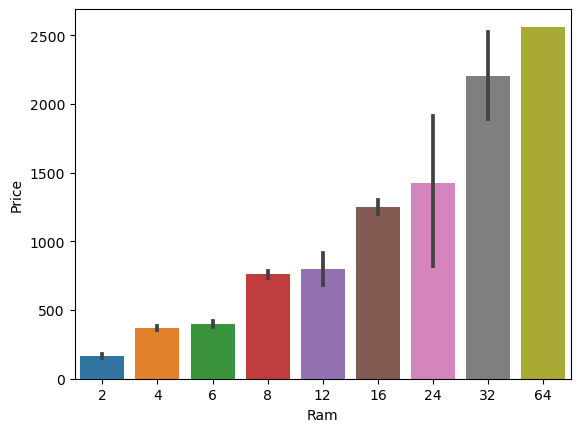

In [47]:
# Visualize Ram vs price columns
sns.barplot(x=df["Ram"], y=df["Price"]);

**Explore the `Memory` column**

We will separate the Type of memory and the value of the memory, just similar to the one which is done in the previous part.



In [48]:
# view the ctegories of different ram types
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [49]:
# 4 most common variations observed: HDD, SSD, Flash, Hybrid

# this expressiog will remove the decimal space. i.e 1.0TB will become 1.TB
df["Memory"] = df["Memory"].astype(str).replace("\.0", "", regex=True)

# replace the GB word with ""
df["Memory"] = df["Memory"].str.replace("GB", "")

# replace the TB word with "000"
df["Memory"] = df["Memory"].str.replace("TB", "000")

# Split the string accross the "+" character
newdf = df["Memory"].str.split("+", n=1, expand=True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [50]:
# We will strip up all the white spaces, basically eliminating white space

df["first"] = newdf[0]
df["first"] = df["first"].str.strip()

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,226.983005,Intel Core i5,256 SSD


In [51]:
def applychanges(value):
    df["Layer1"+value]=df["first"].apply(lambda x:1 if value in x else 0)

list_to_apply = ['HDD','SSD','Hybrid','Flash Storage'] 
for value in list_to_apply:
    applychanges(value)
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [52]:
df["Layer1FlashStorage"] = df["Layer1Flash Storage"]

In [53]:
df.drop(columns=["Layer1Flash Storage"], inplace=True)

In [54]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [55]:
# remove all the character just keep the numbers
df['first'] = df['first'].str.replace(r'\D','', regex=True)
df['first'].value_counts()

256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [56]:
df['Second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,127.677940,Intel Core i5,128,0,0,0,1,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [57]:
def applychanges1(value):
    
    df["Layer2"+value] = df["Second"].apply(lambda x:1 if value in x else 0)
    
list_to_apply_1 = ['HDD', 'SSD', 'Hybrid', 'Flash Storage']
df["Second"] = df["Second"].fillna("0")
for value in list_to_apply_1:
    applychanges1(value)

In [58]:
df["Layer2FlashStorage"] = df["Layer2Flash Storage"]
df.drop(columns=["Layer2Flash Storage"], inplace=True)

In [59]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,...,128,0,0,0,1,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,...,256,0,1,0,0,0,0,0,0,0


In [60]:
# remove all the characters, just keep the numbers
df['Second'] = df['Second'].str.replace(r'\D',"", regex=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Ram                 1303 non-null   int32  
 3   Memory              1303 non-null   object 
 4   Gpu                 1303 non-null   object 
 5   OpSys               1303 non-null   object 
 6   Weight              1303 non-null   float32
 7   Price               1303 non-null   float64
 8   Touchscreen         1303 non-null   int64  
 9   IPS                 1303 non-null   int64  
 10  PPI                 1303 non-null   float64
 11  CPU_name            1303 non-null   object 
 12  first               1303 non-null   object 
 13  Layer1HDD           1303 non-null   int64  
 14  Layer1SSD           1303 non-null   int64  
 15  Layer1Hybrid        1303 non-null   int64  
 16  Layer1

In [62]:
# convert the first and Second columns to intgers
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,...,128,0,0,0,1,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,...,256,0,1,0,0,0,0,0,0,0


In [63]:
# Multliplying the elements and soring the results in a new column to condense the columns
df["HDD"] = (df["first"]*df["Layer1HDD"] + df["Second"]*df["Layer2HDD"])
df["SSD"] = (df["first"]*df["Layer1SSD"] + df["Second"]*df["Layer2SSD"])
df["Hybrid"] = (df["first"]*df["Layer1Hybrid"] + df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"]*df["Layer1FlashStorage"] + df["Second"]*df["Layer2FlashStorage"])

# we will drop unneccesary columns
df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [64]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
285,Acer,Notebook,12,1000 HDD,Intel HD Graphics 620,Windows 10,2.15,424.849392,1,1,141.211998,Intel Core i7,1000,0,0,0
1003,HP,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,1.64,502.211952,0,0,111.935204,Intel Core i5,500,0,0,0
960,Toshiba,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.20,989.596080,0,0,165.632118,Intel Core i5,0,256,0,0
48,Dell,Notebook,4,256 SSD,AMD Radeon R5 M430,Windows 10,2.30,411.955632,0,0,141.211998,Intel Core i5,0,256,0,0
795,Lenovo,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,1.42,1502.123040,1,1,209.800683,Intel Core i5,0,256,0,0


In [65]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
471,HP,Notebook,8,AMD FirePro W4190M,Windows 10,1.90,743.969952,0,0,141.211998,Intel Core i5,500,0,0,0
1282,HP,Netbook,2,Intel HD Graphics 400,Windows 10,1.17,134.739792,0,0,135.094211,Other Intel Processor,0,0,0,32
354,Toshiba,Notebook,16,Nvidia GeForce 930M,Windows 10,2.40,904.497264,0,1,141.211998,Intel Core i7,0,512,0,0
269,Lenovo,Notebook,8,Intel UHD Graphics 620,Windows 10,2.05,567.325440,0,0,141.211998,Intel Core i7,0,256,0,0
687,Dell,Notebook,4,AMD Radeon R5 M430,Windows 10,2.20,351.786901,0,0,100.454670,Intel Core i3,1000,0,0,0


In [66]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

Based on the correlation we observe that `Hybtid's` correlation is almost negligible, therefore we can simply drop the column. While `HDD` and `SSD` are having good correlation scores. We find that `HDD` have a negative correlation score with `Price`. This is true because , if the price of  a laptop is increasing, there is more probability that the laptop is going to have an `SSD` instead o a `HDD` and vice versa.

In [67]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'Touchscreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [68]:
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,863.682067,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,579.535831,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,370.695600,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,1635.863566,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1162.759277,0,1,226.983005,Intel Core i5,0,256


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float32
 6   Price        1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   IPS          1303 non-null   int64  
 9   PPI          1303 non-null   float64
 10  CPU_name     1303 non-null   object 
 11  HDD          1303 non-null   int64  
 12  SSD          1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 122.3+ KB


**Analysis of GPU column**

In [70]:
df["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

Here as we are having less data regarding the laptop, it is better that we focus on` GPU brands` instead of focusing on the values which are present. Hence we will just focus on the brands.

In [71]:
# Extracting only the brand name for the GPU description
df["Gpu brand"] = df["Gpu"].apply(lambda x: x.split()[0])

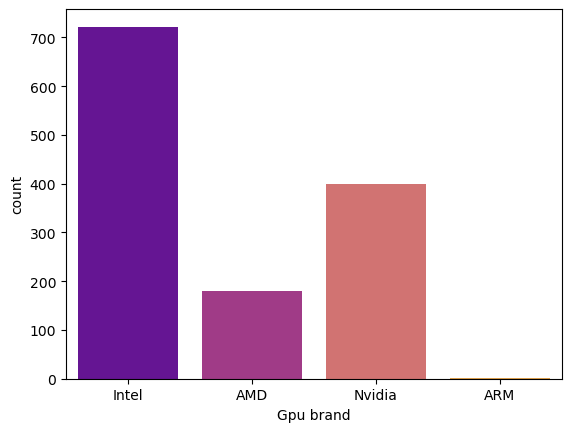

In [72]:
# Plot the count plot
sns.countplot(data=df, x="Gpu brand", palette="plasma");

In [73]:
df["Gpu brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

Only one laptop in the dataset uses a GPU made by ARM so we will drop that row

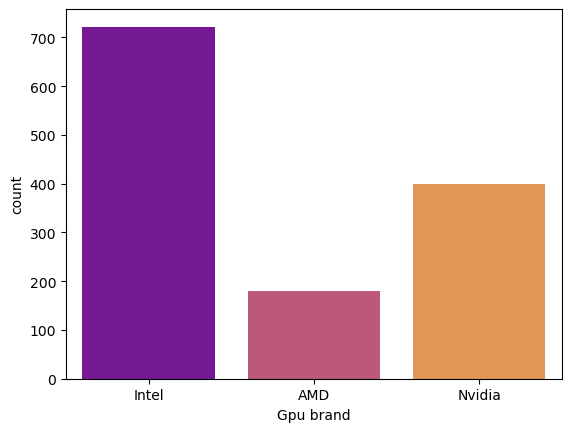

In [74]:
# removing the "ARM" row

df = df[df["Gpu brand"] != "ARM"]
sns.countplot(data=df, x="Gpu brand", palette="plasma");

To check the price vs Gpu brand we will use the `np.median` estimator in order to check if there is any impact of an outlier or not.

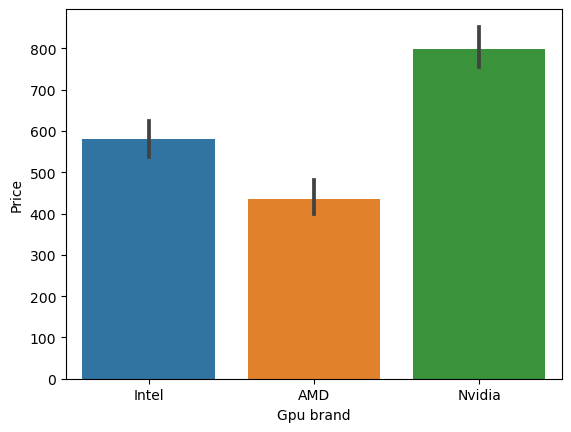

In [75]:
# Price vs Gpu brand
sns.barplot(x=df['Gpu brand'], y=df['Price'], estimator=np.median);

In [76]:
df = df.drop(columns=["Gpu"])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,863.682067,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,579.535831,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,370.695600,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,1635.863566,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1162.759277,0,1,226.983005,Intel Core i5,0,256,Intel


**Operating System Analysis**

In [77]:
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

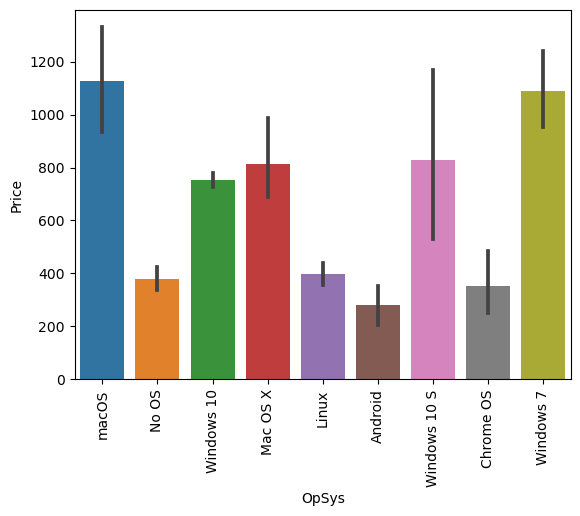

In [78]:
sns.barplot(x=df["OpSys"], y=df["Price"])
plt.xticks(rotation="vertical")
plt.show() 

In [79]:
df["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

We will put all variations Windows OS in one category, all variations of Mac OS in one category all all other OS will be represented and "Other"

In [80]:
def setcategory(text): 
    
    if text=='Windows 10' or text=='Windows 10 S' or text=='Windows 7':
        return "Windows"
    
    elif text=='macOS' or text=='Mac OS X':
            return "Mac"
        
    else:
        return "Other"

In [81]:
df["OpSys"] = df["OpSys"].apply(lambda x: setcategory(x))
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,863.682067,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,579.535831,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,370.695600,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,1635.863566,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,1162.759277,0,1,226.983005,Intel Core i5,0,256,Intel


In [82]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
1045,HP,Notebook,8,Windows,1.84,1355.998058,0,0,141.211998,Intel Core i5,500,256,Intel
1,Apple,Ultrabook,8,Mac,1.34,579.535831,0,0,127.677940,Intel Core i5,0,0,Intel
725,Lenovo,Notebook,4,Other,1.90,315.832651,0,0,100.454670,Intel Core i5,1000,0,Intel
671,Lenovo,Notebook,8,Windows,1.90,527.322550,0,0,141.211998,Intel Core i5,1000,128,AMD
131,Dell,Notebook,4,Windows,2.20,289.464912,0,0,141.211998,Intel Core i3,1000,0,AMD


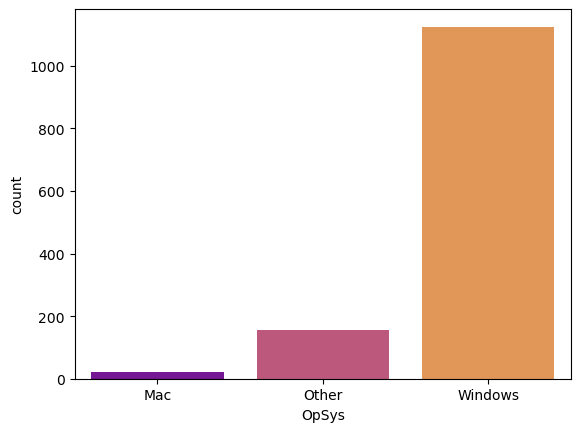

In [83]:
# Visualize count plot
sns.countplot(data=df, x="OpSys",palette='plasma');

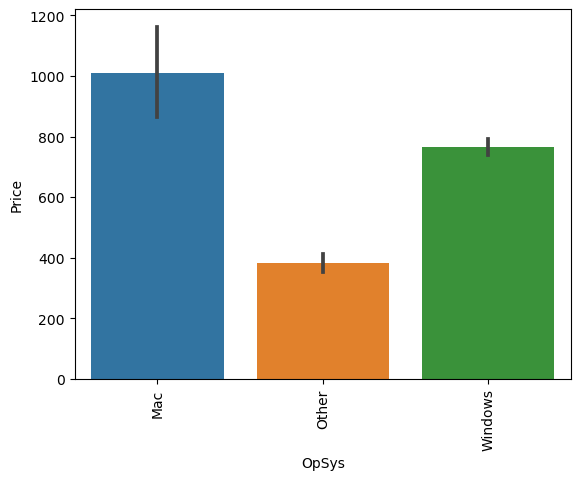

In [84]:
sns.barplot(x = df['OpSys'],y = df['Price'])
plt.xticks(rotation = 'vertical');

**Weight Analysis**

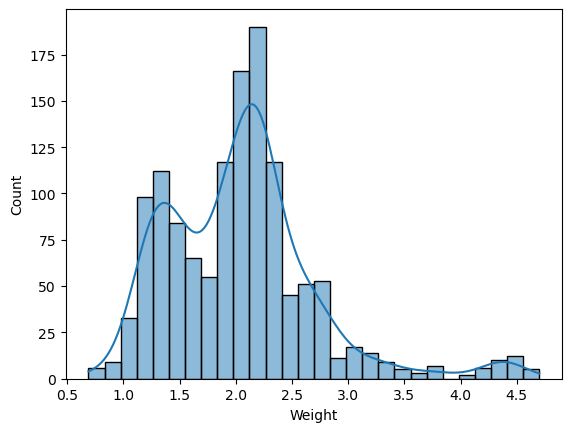

In [85]:
sns.histplot(df["Weight"], kde=True);

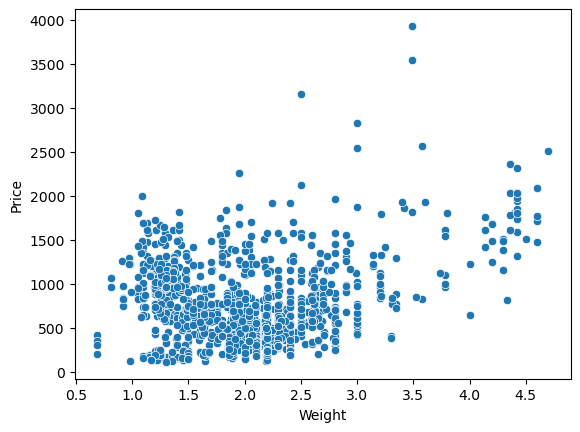

In [86]:
sns.scatterplot(x=df["Weight"], y=df["Price"]);

**Price Analysis**

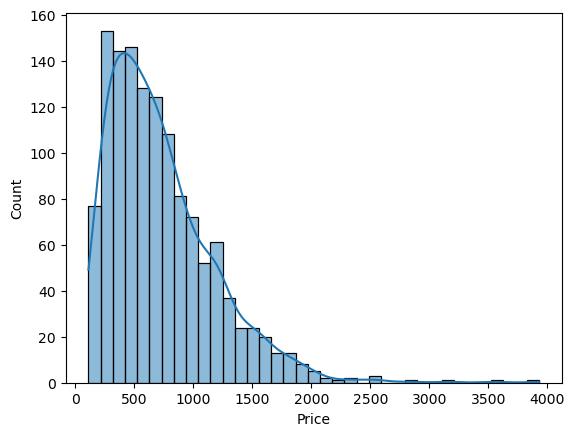

In [87]:
sns.histplot(df["Price"], kde=True);

WE can see that the price distribution is left skewed. We can apply np.log to the Price column and get a Gaussian distribution.

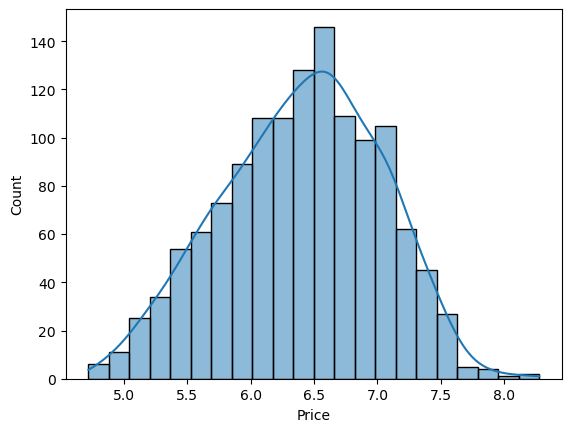

In [88]:
sns.histplot(np.log(df["Price"]), kde=True);

In [89]:
# view the correlation

df.corr(numeric_only=True)["Price"]

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

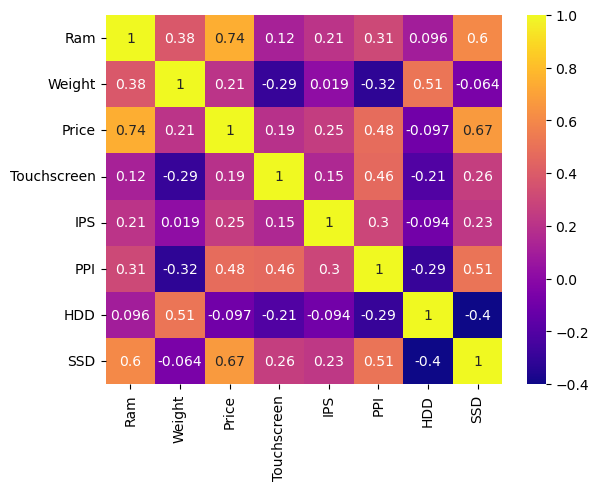

In [90]:
# Plot correlation heat map
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="plasma");

## Model Building

We will be converting the `Price` column into logs to get a better Gaussian distribution and improve our model performance

In [91]:
y = np.log(df["Price"])
X = df.drop(columns=["Price"])

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.15, 
                                                    random_state=42)

X_train.shape, X_test.shape

((1106, 12), (196, 12))

There is a Class which we imported named as `ColumnTranformer`. We use this widely while building our model using `Pipelines` so for this we have to get the index numbers for the columns which are having categorical variables.

In [94]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'Touchscreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand'}

**Write a function that:**
* Transform the data
* Build the model
* Create a pipeline
* Make prediction
* Prints out the `R2 Score` and `MAE`

In [95]:
def run_model(model):
    """
    This fuction takes in the instance of a model, then it transforms
    the data, create a pipeline, 
    make predictions, and prints the R2_score and MAE
    """
    # Transform the data
    cat_transform = ColumnTransformer(
        transformers=[
            ("col_tnf", OneHotEncoder(sparse_output=False), [0, 1, 3, 8, 11])
        ],remainder="passthrough"
    )
    
    global pipeline
    # Create a Pipeline
    pipeline = Pipeline([
        ("cat_transform", cat_transform), 
        ("model", model)
    ])
    
    # Fit the pipeline and train the model
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    print("R2 score: ", metrics.r2_score(y_test, y_pred))
    print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))


### Linear Regression

We will apply one hot encoding on the categorical columns with this indices → [0, 1, 3, 8, 11] . The remainder we will assign the value `passthrough`. i.e no other column must get affected except the ones undergoing the transformation!

In [96]:
# Build Linear Regression pipeline
lr_model = LinearRegression()
run_model(lr_model)

R2 score:  0.7925393581424985
MAE:  0.21373259432720684


Now MAE is 0.21 so if we want to check how much different is there, we do this...

In [97]:
np.exp(0.21)

1.2336780599567432

We see there is a difference of 1.233 only as per the original value, this means our model predicts +0.21 or -0.21 (more/less) that the original price!

### Ridge Regression

We will apply one hot encoding on the categorical columns with this indices → [0, 1, 3, 8, 11] . THe remainder we will assign the value `passthrough`. i.e no other column must get affected except the ones undergoing the transformation!

In [98]:
# Build Ridge Regression pipeline
ridge_model = Ridge(alpha=10)

run_model(ridge_model)

R2 score:  0.7897142428736267
MAE:  0.2163501386511235


### Lasso Regression

We will apply one hot encoding on the categorical columns with this indices → [0, 1, 3, 8, 11] . THe remainder we will assign the value `passthrough`. i.e no other column must get affected except the ones undergoing the transformation!

In [99]:
# Build a Lasso Regression Pipeline
lasso_model = Lasso(alpha=0.001)

run_model(lasso_model)

R2 score:  0.79225063459054
MAE:  0.21541447337437333


### Decision Tree Regression

We will apply one hot encoding on the categorical columns with this indices → [0, 1, 3, 8, 11] . THe remainder we will assign the value `passthrough`. i.e no other column must get affected except the ones undergoing the transformation!

In [100]:
# Instanciate a Decision Tree Model
decision_tree_model = DecisionTreeRegressor(max_depth=8)

run_model(decision_tree_model)

R2 score:  0.8246746268657189
MAE:  0.19710577803070053


### Random Forest Regression

We will apply one hot encoding on the categorical columns with this indices → [0, 1, 3, 8, 11] . THe remainder we will assign the value `passthrough`. i.e no other column must get affected except the ones undergoing the transformation!

In [101]:
# Instanciate a Random Forest Regression
rfr_model = RandomForestRegressor(n_estimators=100, 
                                 random_state=3, 
                                 max_samples=0.5, 
                                 max_features=0.75, 
                                 max_depth=15)

run_model(rfr_model)

R2 score:  0.8526410542577479
MAE:  0.17212354575297345


In [102]:
pipeline.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('cat_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(sparse_output=False),
                                                  [0, 1, 3, 8, 11])])),
                ('model',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])>

Random Forest Regression model performed the best among all the models, so we will save this model and the cleaned dataset.

In [103]:
import pickle 


pickle.dump(pipeline,open("pipeline.pkl", "wb"))

In [104]:
X.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [105]:
# Save the dataset
X.to_csv("cleaned_X_train_data.csv", index=None)

## Hyperparameter Tuning for Random Forest

In [106]:
indexlist = [0, 1, 3, 8, 11]
transformlist = []

for key, value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

['Company', 'TypeName', 'OpSys', 'CPU_name', 'Gpu brand']

In [107]:
X = pd.get_dummies(X, columns=transformlist, drop_first=True)
X.head()

,Ram,Weight,Touchscreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.15, 
                                                    random_state=2)

X_train.shape,X_test.shape

((1106, 38), (196, 38))

In [109]:
# Build a DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

[Text(0.4903130302899515, 0.9782608695652174, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 6.407'),
 Text(0.22247005638179612, 0.9347826086956522, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 5.795'),
 Text(0.1517818795054908, 0.8913043478260869, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.13\nsamples = 256\nvalue = 5.972'),
 Text(0.09720806946035168, 0.8478260869565217, 'CPU_name_Intel Core i7 <= 0.5\nsquared_error = 0.08\nsamples = 154\nvalue = 5.818'),
 Text(0.042021070538300884, 0.8043478260869565, 'Weight <= 1.645\nsquared_error = 0.07\nsamples = 135\nvalue = 5.769'),
 Text(0.00862359361315098, 0.7608695652173914, 'TypeName_Ultrabook <= 0.5\nsquared_error = 0.064\nsamples = 10\nvalue = 6.172'),
 Text(0.006467695209863235, 0.717391304347826, 'Company_Asus <= 0.5\nsquared_error = 0.02\nsamples = 8\nvalue = 6.063'),
 Text(0.005389746008219363, 0.6739130434782609, 'Company_Lenovo <= 0.5\nsquared_error = 0.011\nsamples = 7\nv

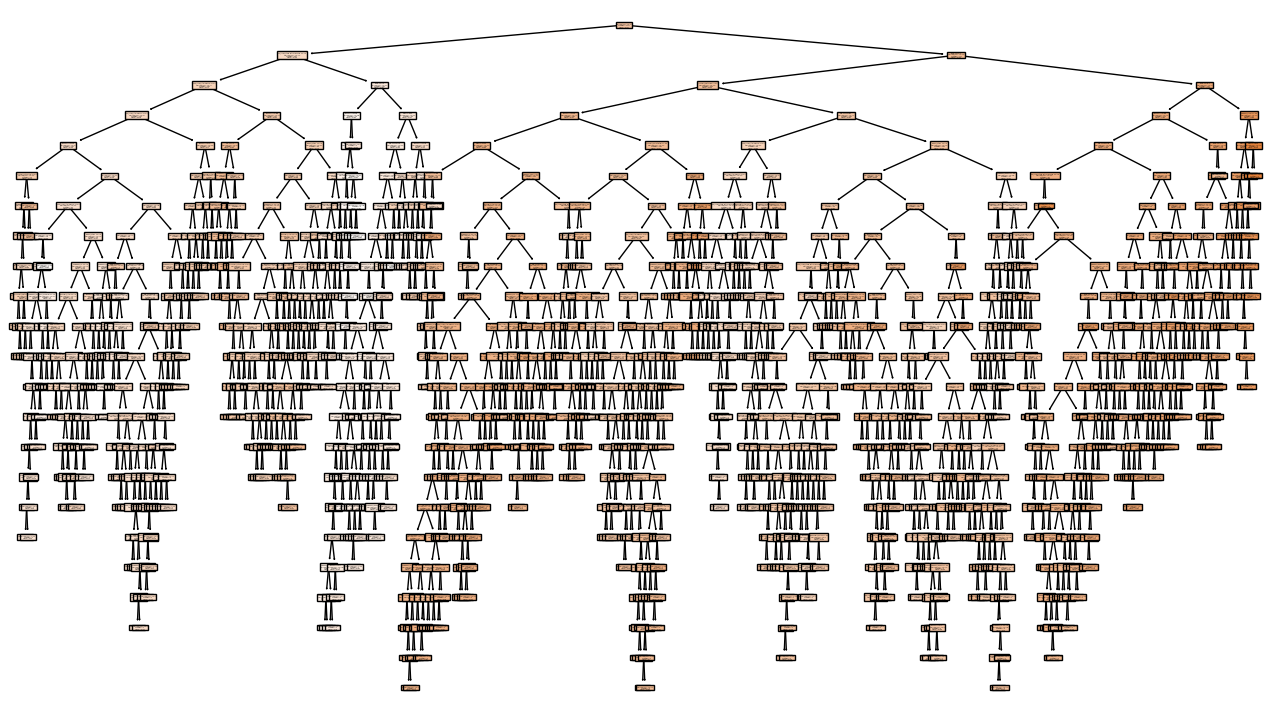

In [110]:
# Plot Tree
plt.figure(figsize=(16, 9))
tree.plot_tree(reg, filled=True, feature_names=X.columns)

In [111]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [112]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

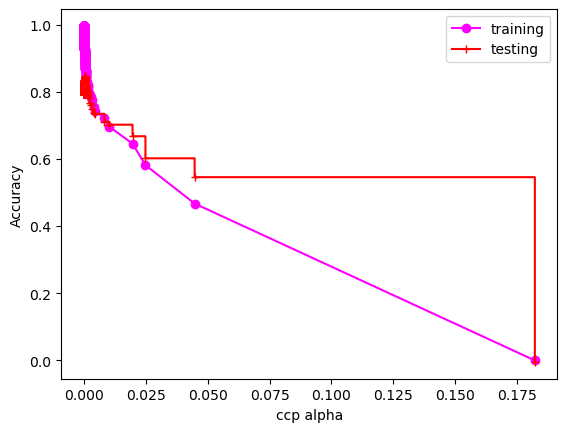

In [113]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

possible values of alpha can lie between [0.0025-->0.0075]

[Text(0.5, 0.9, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 6.407'),
 Text(0.25, 0.7, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 5.795'),
 Text(0.125, 0.5, 'squared_error = 0.13\nsamples = 256\nvalue = 5.972'),
 Text(0.375, 0.5, 'squared_error = 0.084\nsamples = 106\nvalue = 5.367'),
 Text(0.75, 0.7, 'Ram <= 14.0\nsquared_error = 0.215\nsamples = 744\nvalue = 6.704'),
 Text(0.625, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.159\nsamples = 553\nvalue = 6.553'),
 Text(0.5, 0.3, 'squared_error = 0.107\nsamples = 268\nvalue = 6.757'),
 Text(0.75, 0.3, 'PPI <= 114.881\nsquared_error = 0.131\nsamples = 285\nvalue = 6.361'),
 Text(0.625, 0.1, 'squared_error = 0.072\nsamples = 59\nvalue = 5.969'),
 Text(0.875, 0.1, 'squared_error = 0.096\nsamples = 226\nvalue = 6.463'),
 Text(0.875, 0.5, 'squared_error = 0.12\nsamples = 191\nvalue = 7.143')]

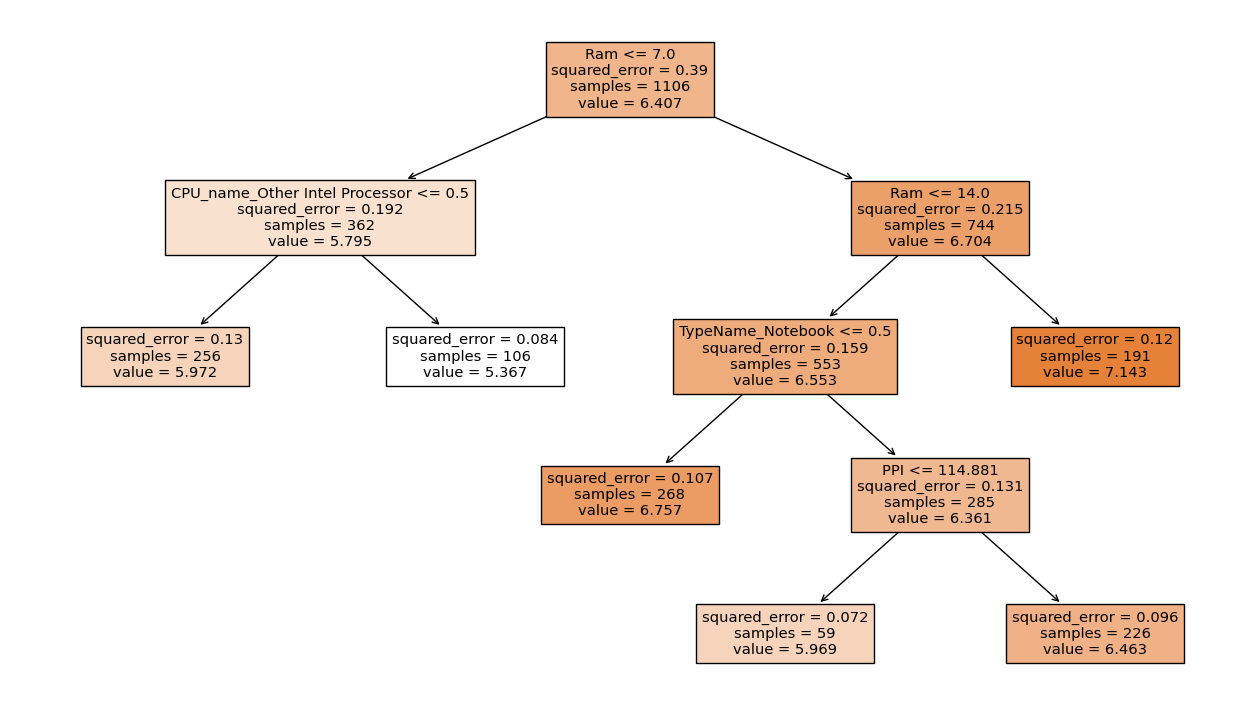

In [114]:
reg = DecisionTreeRegressor(random_state=0, ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=X.columns)

In [115]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':['squared_error', 'absolute_error'],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':[1.0,'sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':['squared_error', 'absolute_error'],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':[1.0,'sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [116]:
params.items()

dict_items([('RandomForest', {'model': RandomForestRegressor(), 'params': {'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200], 'criterion': ['squared_error', 'absolute_error'], 'max_depth': [1, 8, 15, 22, 30], 'max_features': [1.0, 'sqrt', 'log2'], 'ccp_alpha': [0.0025, 0.005, 0.0075, 0.01, 0.0125], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [2, 5, 10, 14]}}), ('Decision Tree', {'model': DecisionTreeRegressor(), 'params': {'criterion': ['squared_error', 'absolute_error'], 'max_depth': [1, 8, 15, 22, 30], 'max_features': [1.0, 'sqrt', 'log2'], 'ccp_alpha': [0.0025, 0.005, 0.0075, 0.01, 0.0125], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [2, 5, 10, 14]}})])

In [117]:
params['RandomForest']

{'model': RandomForestRegressor(),
 'params': {'n_estimators': [100,
   222,
   344,
   466,
   588,
   711,
   833,
   955,
   1077,
   1200],
  'criterion': ['squared_error', 'absolute_error'],
  'max_depth': [1, 8, 15, 22, 30],
  'max_features': [1.0, 'sqrt', 'log2'],
  'ccp_alpha': [0.0025, 0.005, 0.0075, 0.01, 0.0125],
  'min_samples_split': [2, 5, 10, 14],
  'min_samples_leaf': [2, 5, 10, 14]}}

In [118]:
# scores = []
# for modelname,mp in params.items():
#     clf = RandomizedSearchCV(mp['model'],
#                             param_distributions=mp['params'],cv = 5,
#                             n_iter=10,scoring='neg_mean_squared_error',verbose=2)
#     clf.fit(X_train,y_train)
#     scores.append({
#         'model_name':modelname,
#         'best_score':clf.best_score_,
#         'best_estimator':clf.best_estimator_,
#     })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   2.4s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   2.6s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   2.5s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   2.9s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   3.2s
[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=1, max_features=1.0, min_samples_leaf=5, min_samples_split=10

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=1.0, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=1.0, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=1.0, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=1.0, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=1.0, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_feature

In [119]:
# scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
# scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.083783,"(DecisionTreeRegressor(ccp_alpha=0.005, criter..."
1,Decision Tree,-0.091322,"DecisionTreeRegressor(ccp_alpha=0.0025, max_de..."


In [120]:
# scores

[{'model_name': 'RandomForest',
  'best_score': -0.0837831233489004,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.005, criterion='absolute_error', max_depth=30,
                        min_samples_leaf=2, min_samples_split=14)},
 {'model_name': 'Decision Tree',
  'best_score': -0.09132220501205268,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.0025, max_depth=8, max_features=1.0,
                        min_samples_leaf=5, min_samples_split=5)}]

In [121]:
rf = RandomForestRegressor(ccp_alpha=0.005, 
                           max_depth=30, 
                           max_features='sqrt',
                           min_samples_leaf=5, 
                           min_samples_split=10,
                           n_estimators=955)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

0.8049101116377853


In [122]:
# Instanciate a Random Forest Regression
rfr = RandomForestRegressor(n_estimators=100, 
                            random_state=3, 
                            max_samples=0.5, 
                            max_features=0.75, 
                            max_depth=15)

rfr.fit(X_train,y_train)
ypred = rfr.predict(X_test)
print(metrics.r2_score(y_test,ypred))

0.8846320161543462


### Prediction on the whole Dataset

In [123]:
np.array(X)

array([[8.        , 1.37      , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [8.        , 1.34000003, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [8.        , 1.86000001, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [2.        , 1.5       , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [6.        , 2.19000006, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [4.        , 2.20000005, 0.        , ..., 1.        , 1.        ,
        0.        ]])

In [124]:
predicted = []
testtrain = np.array(X)
for i in range(len(testtrain)):
    predicted.append(rfr.predict([testtrain[i]]))
    
predicted

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid fea

C:\Users\Segun Lawal\anaconda3\envs\zero_to_mastery_ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[array([6.76971662]),
 array([6.45481841]),
 array([6.18604342]),
 array([7.39560168]),
 array([6.90923214]),
 array([5.49278997]),
 array([7.0889976]),
 array([6.45481841]),
 array([6.99615818]),
 array([6.38591991]),
 array([5.82063578]),
 array([5.52123804]),
 array([7.30655672]),
 array([5.83341159]),
 array([6.75887029]),
 array([6.90923214]),
 array([6.31652602]),
 array([7.39560168]),
 array([5.90062022]),
 array([6.61805101]),
 array([5.0797865]),
 array([6.45623806]),
 array([5.29645642]),
 array([6.36182941]),
 array([6.44297333]),
 array([5.6683928]),
 array([6.48697581]),
 array([6.26267537]),
 array([6.76730274]),
 array([6.35921526]),
 array([5.23293819]),
 array([5.51753532]),
 array([5.75759324]),
 array([7.22732404]),
 array([6.48697581]),
 array([5.20407698]),
 array([5.52561728]),
 array([6.47986187]),
 array([5.95296874]),
 array([6.36328558]),
 array([5.62010614]),
 array([6.876715]),
 array([5.92784913]),
 array([6.12467631]),
 array([6.54868906]),
 array([6.90923

As we transformed our price variable to `np.log`, we have to re-transform it from `np.log` → `np.exp` in order to get the right result

In [125]:
prices = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [126]:
df["Predicted Price"] = np.array(prices)
df

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,863.682067,0,1,226.983005,Intel Core i5,0,128,Intel,871.065016
1,Apple,Ultrabook,8,Mac,1.34,579.535831,0,0,127.677940,Intel Core i5,0,0,Intel,635.758268
2,HP,Notebook,8,Other,1.86,370.695600,0,0,141.211998,Intel Core i5,0,256,Intel,485.919716
3,Apple,Ultrabook,16,Mac,1.83,1635.863566,0,1,220.534624,Intel Core i7,0,512,AMD,1628.804654
4,Apple,Ultrabook,8,Mac,1.37,1162.759277,0,1,226.983005,Intel Core i5,0,256,Intel,1001.477953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,411.310944,1,1,157.350512,Intel Core i7,0,128,Intel,433.168593
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,966.387312,1,1,276.053530,Intel Core i7,0,512,Intel,1031.224002
1300,Lenovo,Notebook,2,Windows,1.50,147.633552,0,0,111.935204,Other Intel Processor,0,0,Intel,156.634433
1301,HP,Notebook,6,Windows,2.19,492.541632,0,0,100.454670,Intel Core i7,1000,0,AMD,455.681220


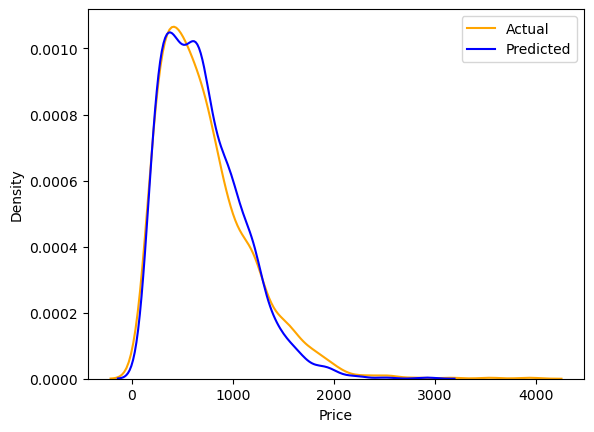

In [127]:
sns.kdeplot(df['Price'],color='orange',label='Actual')
sns.kdeplot(df['Predicted Price'],color='blue',label='Predicted')
plt.legend()
plt.show()

In [128]:
import pickle
file = open('laptoppricepredictor.pkl','wb')
pickle.dump(rfr,file)
file.close()

In [129]:
X 

,Ram,Weight,Touchscreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1299,16,1.30,1,1,276.053530,0,512,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1300,2,1.50,0,0,111.935204,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1301,6,2.19,0,0,100.454670,1000,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [130]:
y

0       6.761205
1       6.362227
2       5.915381
3       7.399926
4       7.058551
          ...   
1298    6.019349
1299    6.873565
1300    4.994733
1301    6.199579
1302    5.471808
Name: Price, Length: 1302, dtype: float64

**Lets train the model on the whole data set**

In [131]:
# Instanciate a Random Forest Regression
rfr_whole_data = RandomForestRegressor(n_estimators=100, 
                            random_state=3, 
                            max_samples=0.5, 
                            max_features=0.75, 
                            max_depth=15)

rfr_whole_data.fit(X,y)

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)

In [132]:
import pickle
file = open('rfr_whole_data.pkl','wb')
pickle.dump(rfr,file)
file.close()